## Richardson Lucy cupy dask example

This example shows how to call richardson_lucy_cp and richardson_lucy_cp_dask.  This will only work on systems that support cuda (not Mac-m1)

In [90]:
from tnia.deconvolution.richardson_lucy import richardson_lucy_cp
from tnia.deconvolution.richardson_lucy_dask_cp import richardson_lucy_dask_cp
    

## Load images

Load the bars image. Remember to change ```image_path``` to a local machine

(You can get a copy of bars (originally from BIG lab EPFL) from tnia-python-images, which can be found [here](https://www.dropbox.com/scl/fo/1k3ujlh3lmk1pmnvpk3xb/h?rlkey=fqwp26p8ygdknqbc1ucajqssn&dl=0) )

(128, 256, 256) (128, 256, 256) (128, 256, 256)


Text(0.5, 0.98, 'imgage')

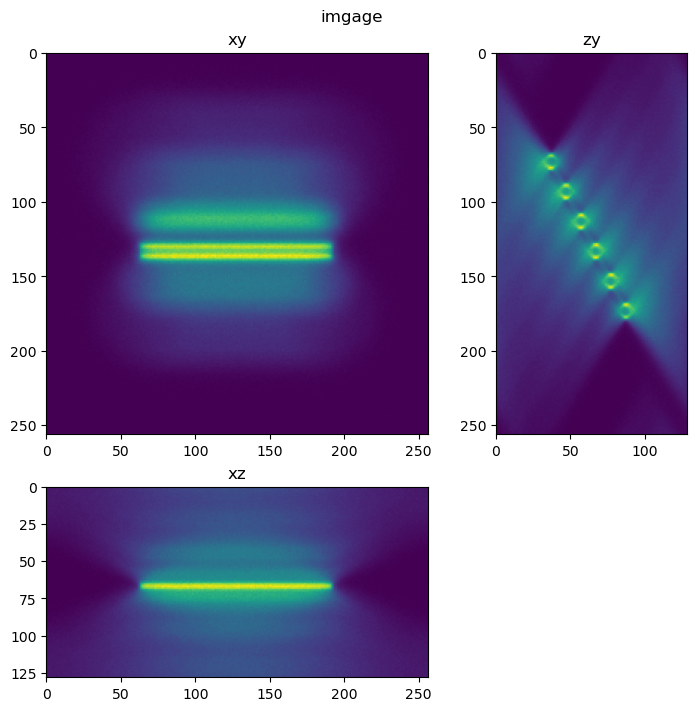

In [41]:
from skimage.io import imread
from pathlib import Path
from tnia.plotting.projections import show_xyz_slice_center 
# local path to the data folder
image_path = Path(r'D:\images\tnia-python-images\deconvolution\bars')

image_name='Bars-G10-P30-stack.tif'
psf_name='PSF-Bars-stack.tif'
truth_name='Bars-stack.tif'

img=imread(image_path / image_name)
psf=imread(image_path / psf_name)
truth=imread(image_path / truth_name)
img=img.astype('float32')
psf=psf.astype('float32')
psf=psf/psf.sum()
print(img.shape, psf.shape, truth.shape)

fig = show_xyz_slice_center(img, figsize=(7,7))
fig.suptitle('imgage')

## Run non-dask Richardson Lucy cp

In [88]:
decon = richardson_lucy_cp(img, psf, 100, True)


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


## Run dask Richardson Lucy cp

In [92]:

## Set mem_to_use to a small fraction of the available memory to force it to chunk the relatively small bars image
## !!!! Change this to -1 to use all GPU memory or set to a more reasonable fraction
mem_to_use=.5
decon_dask = richardson_lucy_dask_cp(img, psf, 100, overlap=10, mem_to_use=mem_to_use, num_devices=1, debug=True)

richardson_lucy_dask_cp

image size (128, 256, 256)
psf size (128, 256, 256)
gpu mem is  0.4448699951171875
rl mem is  0.9993009567260742
chunk factor is  2.0
chunk size is (128, 128.0, 128.0)
image dimension is 0
image dimension is 0

start rlnc
gpu num is 0
block id is (0, 0, 0)
block info is {0: {'shape': (128, 276, 276), 'num-chunks': (1, 2, 2), 'array-location': [(0, 128), (0, 138), (0, 138)], 'chunk-location': (0, 0, 0)}, None: {'shape': (128, 276, 276), 'num-chunks': (1, 2, 2), 'array-location': [(0, 128), (0, 138), (0, 138)], 'chunk-location': (0, 0, 0), 'chunk-shape': (128, 138, 138), 'dtype': <class 'numpy.float32'>}}

0 10 20 30 40 50 60 70 80 90 
putting gpu num back 0

start rlnc
gpu num is 0
block id is (0, 0, 1)
block info is {0: {'shape': (128, 276, 276), 'num-chunks': (1, 2, 2), 'array-location': [(0, 128), (0, 138), (138, 276)], 'chunk-location': (0, 0, 1)}, None: {'shape': (128, 276, 276), 'num-chunks': (1, 2, 2), 'array-location': [(0, 128), (0, 138), (138, 276)], '

Text(0.5, 0.98, 'decon (dask)')

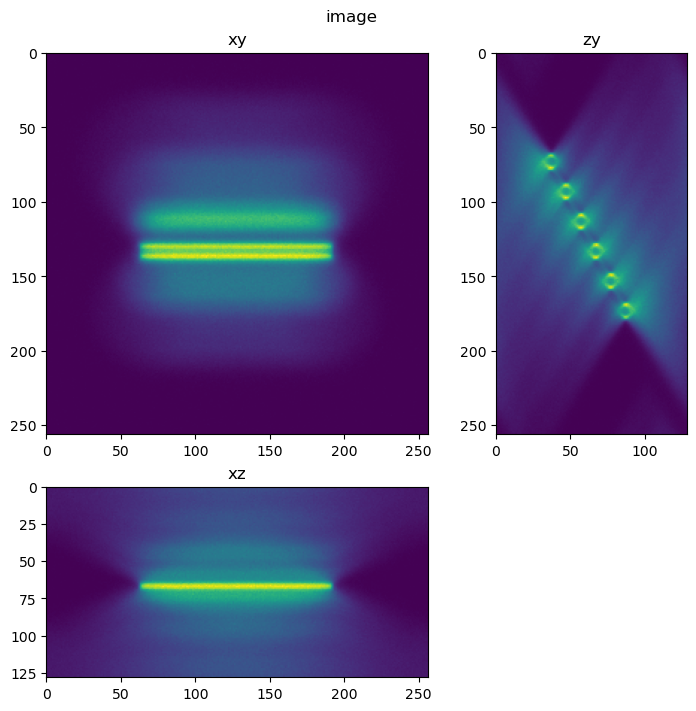

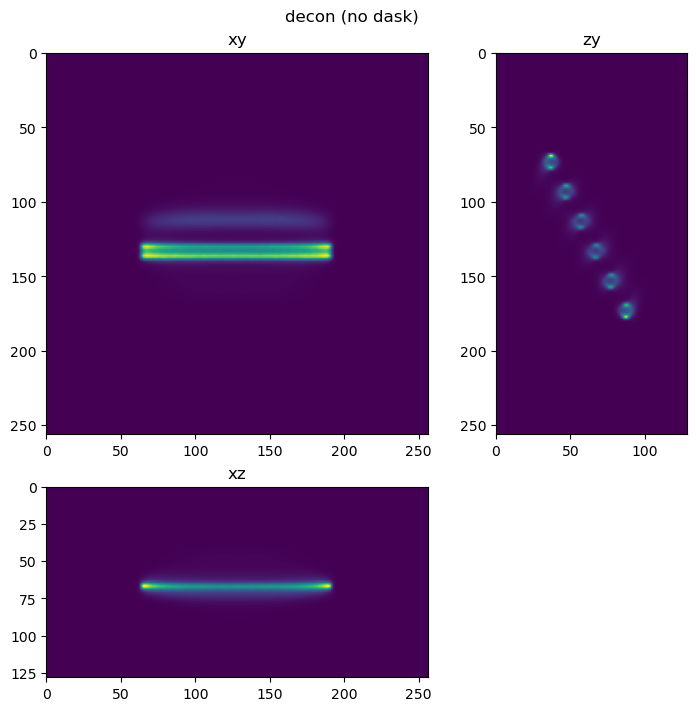

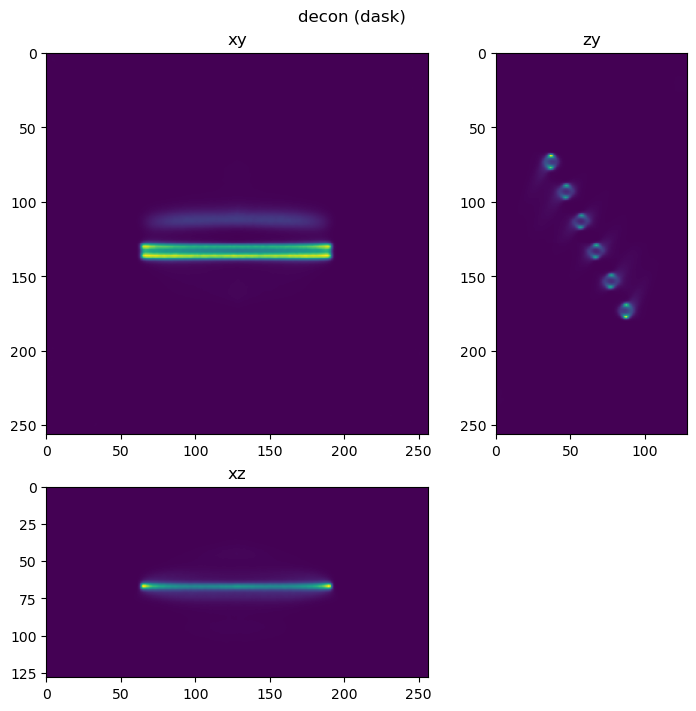

In [93]:
fig = show_xyz_slice_center(img, figsize=(7,7))
fig.suptitle('image')
fig = show_xyz_slice_center(decon, figsize=(7,7))
fig.suptitle('decon (no dask)')
fig = show_xyz_slice_center(decon_dask, figsize=(7,7))
fig.suptitle('decon (dask)')

In [81]:
import napari
viewer = napari.Viewer()
viewer.add_image(img)
viewer.add_image(decon)

<Image layer 'decon' at 0x29423ee2eb0>

In [73]:
print(img.dtype)
print(decon.dtype)
img.min(), img.max()

float32
float32


(0.0, 65535.0)